In [1]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, log_loss, mean_squared_error
from sklearn.preprocessing import LabelBinarizer
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from TrainTestData import loadData
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

In [2]:
X_train, X_test, y_train, y_test, data, feature_columns, categorical_features,target_column = loadData()

In the preprocessing stage of our multi-class classification pipeline, we employ a crucial step of transforming categorical target variables into a numerical format. This transformation is essential
for compatibility with XGBoost, a gradient boosting framework that requires numerical input to perform mathematical operations and optimizations integral to its learning algorithm (Chen & Guestrin,
2016).
XGBoost, like many machine learning algorithms, operates on numerical data to execute arithmetic operations, gradient calculations, and optimization procedures. These operations are not inherently
defined for categorical data, necessitating a transformation of categorical labels into a numerical representation (Bishop, 2006).
Specifically, for a multi-class classification problem, each unique categorical class label is assigned a unique integer value, a process known as label encoding. This procedure transforms the
categorical target variable into a format amenable to the mathematical computations required by XGBoost (Hastie, Tibshirani, & Friedman, 2009).
For a dataset with \(C\) unique classes, label encoding maps each class to a unique integer in the range \([0, C-1]\). This approach is both efficient and straightforward, ensuring that the
transformed target variable retains the essential categorical information in a numerical format compatible with XGBoost's requirements (James, Witten, Hastie, & Tibshirani, 2013).
Upon transformation, XGBoost utilizes the numerical labels to compute a multi-class log loss (cross-entropy loss) when the `multi:softprob` or `multi:softmax` objective function is specified. This
loss function quantifies the difference between the predicted probabilities and the actual class labels, guiding the model's learning process (Friedman, 2001).
The transformation of categorical data into numerical form is supported by the foundational principles of statistical learning, which emphasize the necessity of numerical representation for the
application of mathematical models to data analysis and prediction tasks (Bishop, 2006; Hastie, Tibshirani, & Friedman, 2009). Furthermore, research by Chen and Guestrin (2016) on XGBoost highlights
the effectiveness of gradient boosting machines for various tasks, including multi-class classification, when data is appropriately preprocessed and encoded.
Data transformation step is not merely a technical requirement but a scientifically grounded practice that enhances the ability of XGBoost to accurately model and predict outcomes in multi-class
classification settings. By converting categorical labels into a numerical format, we align our dataset with the underlying mathematical framework of machine learning algorithms, facilitating
efficient and effective model training and prediction.

In [3]:
#initialise coder and classifier
xgb_clf = XGBClassifier(objective="multi:softprob",use_label_encoder=False, eval_metric='mlogloss')

Accuracy: 0.5273
F1-Score: 0.4640
Precision: 0.4809
Recall: 0.5273
ROC-AUC Score: 0.7444
Log Loss: 1.2049


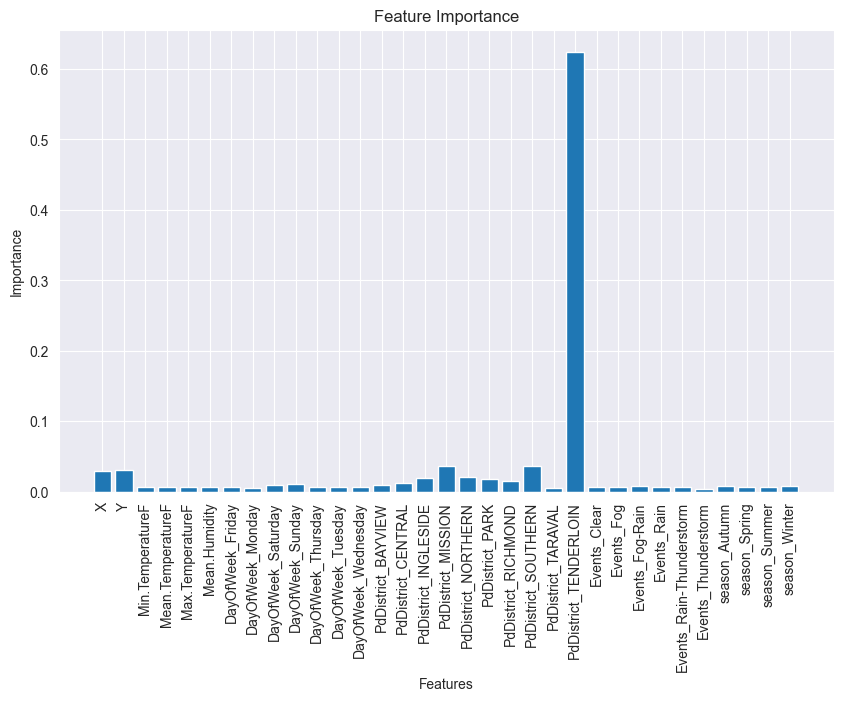

In [7]:
# Training des Classifiers
xgb_clf.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred = xgb_clf.predict(X_test)

# Vorhersagen der Wahrscheinlichkeiten für das Testset, um ROC-AUC und Log Loss zu berechnen
y_pred_proba = xgb_clf.predict_proba(X_test)

# Berechnung der verschiedenen Metriken
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' berücksichtigt Label-Unausgewogenheit
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# ROC-AUC Score erfordert binarisierte Labels für Mehrklassenklassifikation
lb = LabelBinarizer()
lb.fit(y_test)
y_test_binarized = lb.transform(y_test)
y_pred_binarized = lb.transform(y_pred)

roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovo', average='weighted')
logloss = log_loss(y_test, y_pred_proba)

# Ausgabe der Metriken
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Feature Importance extrahieren
importance = xgb_clf.feature_importances_
feature_names = X_train.columns.tolist()

# Feature Importance plotten
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance)
plt.xticks(range(len(importance)), feature_names, rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

Recursive Feature Elimination (RFE) is an effective method for feature selection that can enhance the performance of predictive models in statistics and machine learning. This technique aims to identify the most predictive features by successively removing the least important ones. The process starts with the complete set of features and iteratively eliminates the least significant feature, based on the model criterion chosen, until a predetermined number of features is reached or the model performance reaches an optimum.

A key aspect of RFE is its ability to derive feature importance directly from the coefficients of models that provide intrinsic feature weightings, such as linear models and Support Vector Machines (Guyon et al., 2002). By incorporating Cross-Validation (CV) into the RFE process, known as RFECV, the robustness of feature selection is further enhanced by accounting for the variability of model performance across different data splits (Kohavi, 1995).

The application of RFE can offer value across numerous domains, from bioinformatics to financial modeling, by not only improving model performance through the reduction of overfitting and enhancement of generalizability but also contributing to the interpretability of the models by highlighting the most relevant features.

Optimal number of features: 28
Selected features and their rankings:
X: Rank 1
Y: Rank 1
Min.TemperatureF: Rank 1
Mean.TemperatureF: Rank 1
Max.TemperatureF: Rank 1
Mean.Humidity: Rank 1
DayOfWeek_Friday: Rank 1
DayOfWeek_Monday: Rank 4
DayOfWeek_Saturday: Rank 1
DayOfWeek_Sunday: Rank 1
DayOfWeek_Thursday: Rank 3
DayOfWeek_Tuesday: Rank 2
DayOfWeek_Wednesday: Rank 1
PdDistrict_BAYVIEW: Rank 1
PdDistrict_CENTRAL: Rank 1
PdDistrict_INGLESIDE: Rank 1
PdDistrict_MISSION: Rank 1
PdDistrict_NORTHERN: Rank 1
PdDistrict_PARK: Rank 1
PdDistrict_RICHMOND: Rank 1
PdDistrict_SOUTHERN: Rank 1
PdDistrict_TARAVAL: Rank 5
PdDistrict_TENDERLOIN: Rank 1
Events_Clear: Rank 1
Events_Fog: Rank 1
Events_Fog-Rain: Rank 1
Events_Rain: Rank 1
Events_Rain-Thunderstorm: Rank 1
Events_Thunderstorm: Rank 6
season_Autumn: Rank 1
season_Spring: Rank 1
season_Summer: Rank 1
season_Winter: Rank 1


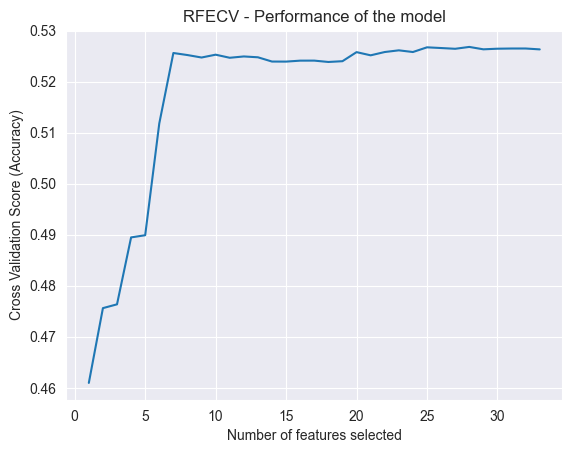

In [5]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
# RFECV vorbereiten
cv_strategy = StratifiedKFold(n_splits=5)
rfecv = RFECV(estimator=xgb_clf, step=1, cv=cv_strategy, scoring='accuracy')

# RFECV on train data
rfecv.fit(X_train, y_train)

# Output the results of the feature selection
print("Optimal number of features: %d" % rfecv.n_features_)

# Extracting the feature names based on RFECV support
selected_features = X_train.columns[rfecv.support_]

# Output of the selected feature names and their rankings
print("Selected features and their rankings:")
for rank, feature in zip(rfecv.ranking_, X_train.columns):
    print(f"{feature}: Rank {rank}")

# Plot
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross Validation Score (Accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title('RFECV - Performance of the model')
plt.show()


Preliminary testing of machine learning models is crucial during the development phase, providing early insights into model performance and setting the stage for further optimizations. 
These tests, often conducted via cross-validation this allows us to assess the robustness and generalizability of our models before committing extensive resources to fine-tuning and evaluation.
Cross-validation, a common method for preliminary testing, is a powerful tool for assessing model quality. 
It splits the data into multiple subsets and performs repeated training and testing runs to ensure the model performs reliably on unseen data (Kohavi, 1995). 
This method helps avoid overfitting and provides an unbiased estimate of model performance.
On our research we found out that scientific studies have underscored the importance of early model evaluation in the development process. 
It allows for the quick identification of inefficient approaches, focusing resources on more promising models (Guyon et al., 2002). We know that one of our project tasks is to implement
hyperparameters and improve the model.
Therefore, we know that our model may have weaknesses at the beginning and is not the best, but we still want to go one step further and train an early model to gain more insights.
Furthermore, research highlights the significance of selecting appropriate metrics for performance evaluation, as they can significantly influence the direction of development and the assessment of model quality (Powers, 2011).
We do this because in practice, preliminary tests support the iterative improvement of models by identifying strengths and weaknesses at early stages of development. This approach promotes efficient
use of resources and ultimately leads to more powerful and reliable machine learning models.


In [6]:
from sklearn.model_selection import cross_validate

# Scoring-Kriterien definieren
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'roc_auc_ovr': 'roc_auc_ovr'
}

# Kreuzvalidierung mit mehreren Metriken
cv_results = cross_validate(xgb_clf, X_train, y_train, cv=4, scoring=scoring, return_train_score=False)

# Ergebnisse ausgeben
for metric in scoring.keys():
    print(f"Average {metric}: {np.mean(cv_results[f'test_{metric}']) * 100:.2f}%")
    print(f"Standard deviation {metric}: {np.std(cv_results[f'test_{metric}']) * 100:.2f}%")

Average accuracy: 52.63%
Standard deviation accuracy: 0.11%
Average f1_macro: 35.68%
Standard deviation f1_macro: 0.13%
Average roc_auc_ovr: 74.45%
Standard deviation roc_auc_ovr: 0.06%


In [0]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Die Confusion Matrix ist eine grundlegende und sehr informative Visualisierung,
# die zeigt, wie gut das Modell die verschiedenen Klassen unterscheidet.
# Sie gibt die Anzahl der korrekten und falschen Vorhersagen für jede Klasse an und hilft,
# die Bereiche zu identifizieren, in denen das Modell möglicherweise verbessert werden muss

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Die Receiver Operating Characteristic (ROC)-Kurve und die Area Under the Curve (AUC)
# sind besonders nützlich für binäre Klassifizierungsprobleme.
# Sie können auch für Mehrklassenprobleme angepasst werden,
# indem man die One-vs-All-Strategie für jede Klasse anwendet.
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Farben für die verschiedenen Klassen
colors = cycle(['blue', 'red', 'green', 'orange', 'black'])

# Plotten der ROC-Kurve für jede Klasse
plt.figure(figsize=(7, 5))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Berechnung für jede Klasse
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i],
                                                        y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])

 The Precision-Recall (PR) curve is an essential tool for assessing the effectiveness of classifiers, especially in situations with imbalanced datasets.
 Precision and Recall are two metrics used to evaluate the quality of a classification model. Precision indicates the proportion of instances classified as
 positive that are actually positive, while Recall indicates the proportion of actual positive instances that were classified as positive (Davis & Goadrich,
 2006). 
 The PR curve plots these two metrics in a coordinate system, with Recall on the X-axis and Precision on the Y-axis.
 The PR curve is particularly important in areas where the costs of false positives are very different or when the classes are imbalanced as in our project.
 In such cases, the PR curve can provide more detailed insights into the model's performance than other metrics, such as the ROC curve (Receiver Operating
 Characteristic Curve). 
 The area under the PR curve (AUC-PR) can be considered a measure of the overall performance of the classification model (Saito & Rehmsmeier, 2015).

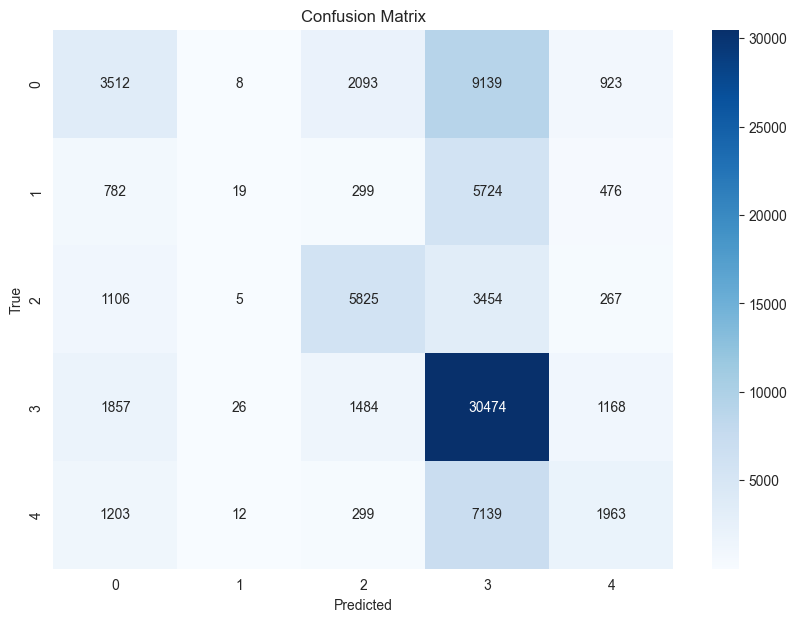

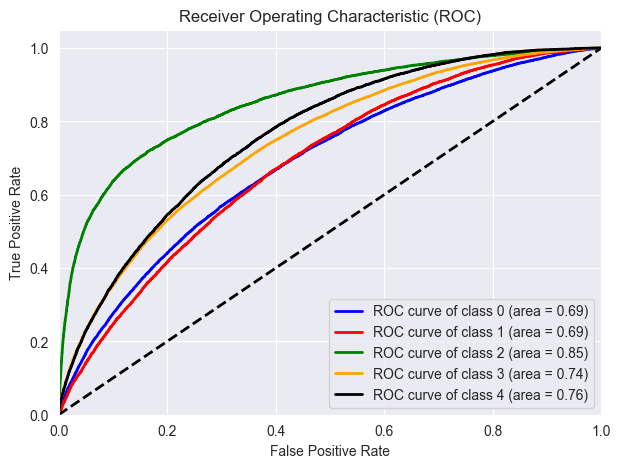

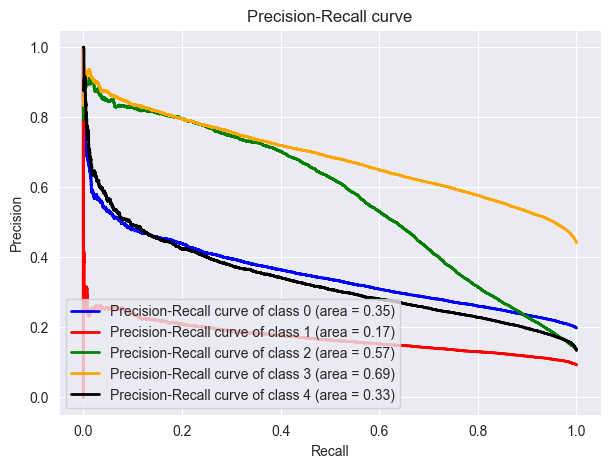

In [7]:
# Die Precision-Recall-Curve
plt.figure(figsize=(7, 5))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label='Precision-Recall curve of class {0} (area = {1:0.2f})'
             ''.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()


# The Necessity of Applying GridSearchCV in Model Optimization

The process of developing a predictive model involves not only selecting an appropriate algorithm but also fine-tuning its hyperparameters to optimize performance.
GridSearchCV, a systematic approach for parameter tuning, plays a pivotal role in identifying the most effective combinations of hyperparameters for a given model.
This method systematically works through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. 
The necessity of employing GridSearchCV can be substantiated by several key
factors.

Comprehensive Exploration
GridSearchCV enables a comprehensive exploration of the parameter space, ensuring that the selected model is not just a product of arbitrary parameter choices but is instead optimized based on empirical evidence. 
This exhaustive search guarantees that the model's potential is fully realized by examining various permutations and combinations of parameters (Bergstra & Bengio, 2012).

Enhanced Model Performance
By meticulously searching through the parameter space, GridSearchCV often uncovers hyperparameter settings that significantly enhance model performance compared to the default
settings. This optimization process is crucial for complex datasets where the optimal model configuration is not intuitively obvious (Claesen & De Moor, 2015).

Bias-Variance Tradeoff Management
The selection of hyperparameters has a profound impact on the bias-variance tradeoff. GridSearchCV assists in finding a balance, thereby reducing the risk of overfitting or
underfitting. This balance is crucial for achieving generalizable model performance across unseen data (James et al., 2013).

Reproducibility and Rigor
Employing GridSearchCV adds rigor and reproducibility to the model development process. By documenting the explored parameter space and the performance of each combination
researchers and practitioners provide a transparent account of the optimization process, facilitating replication and verification of the results (Varoquaux et al., 2015).

Therefore, we use GridSearchCV with the grid parameters specified in the code to find out which parameters could be the best.
However, it is also the case that parameters that do not appear in the array could be better.
But we select these and no more because the calculation is quite time-consuming and resource-intensive.

In [4]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Grid
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

# GridSearchCV-Initialisierung
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=4, n_jobs=-1)

# Suche nach den besten Parametern
grid_search.fit(X_train, y_train)

# Scores
print(f"Best Parameter: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")


Best Parameter: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1.0}
Best Accuracy: 52.73%


'learning_rate': 0.2: The learning rate determines how quickly or slowly a model learns from the errors in the training data. A learning rate of 0.2 is relatively high, meaning the model will converge faster, but there is a risk of it overshooting the optimum. For complex data sets, a higher learning rate can result in faster, but potentially less precise, adjustments.

'max_depth': 5: The maximum depth of a tree limits how detailed the model can learn the data structures. A depth of 5 is a compromise between the model's ability to recognize patterns in the data and the risk of overfitting. It allows for some complexity in the model predictions without diving too deeply into the data.

'n_estimators': 300: This number indicates how many trees to build in the ensemble model. 300 trees means the model tries to learn from the errors of 299 previous trees to improve predictions. A higher number of estimators can improve model performance, but also leads to longer training time and increased risk of overfitting if not controlled by other measures.

'subsample': 1.0: This means that the model uses all available data when training each tree instead of taking a sample. This can improve performance if the training data is diverse and representative, but also runs the risk of overfitting since each tree sees exactly the same data.

 'Accuracy = 52.73%': This number indicates the best accuracy achieved by the model using the hyperparameters mentioned above. An accuracy of just over 50% suggests that the model is only slightly
 better than random guessing, assuming a binary classification task. However, for multiclass classification as in our project or with a very balanced data set, this might represent acceptable
 performance.

TODO: 
1. standard modell trainieren mit angepassten parametern (auswerten)
2. FEATURES anpassen 
3. feature angepasstes modell nochmal trainieren ohne parameter (auswerten)
4. feature angepasstes modell gridsearch cv 
5. feature angepasstes modell mit angepassten parametern trainieren (auswerten)

**References:**

- T. Chen & C. Guestrin (2016). XGBoost: A Scalable Tree Boosting System. In Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining.
- C.M. Bishop (2006). Pattern Recognition and Machine Learning. Springer.
- T. Hastie, R. Tibshirani, & J. Friedman (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer Series in Statistics.
- G. James, D. Witten, T. Hastie, & R. Tibshirani (2013). An Introduction to Statistical Learning: with Applications in R. Springer Texts in Statistics.
- J.H. Friedman (2001). Greedy Function Approximation: A Gradient Boosting Machine. The Annals of Statistics.
- Guyon, I., Weston, J., Barnhill, S., & Vapnik, V. (2002). Gene selection for cancer classification using support vector machines. Machine Learning, 46(1-3), 389-422.
- Kohavi, R. (1995). A study of cross-validation and bootstrap for accuracy estimation and model selection. IJCAI'95: Proceedings of the 14th international joint conference on Artificial intelligence, 2(12), 1137-1145.
- Databasecamp. (2023) https://databasecamp.de/statistik/f1-score
- Davis, J., & Goadrich, M. (2006). The relationship between Precision-Recall and ROC curves. In Proceedings of the 23rd international conference on Machine learning (pp. 233-240).
- Saito, T., & Rehmsmeier, M. (2015). The Precision-Recall plot is more informative than the ROC plot when evaluating binary classifiers on imbalanced datasets.
- (2023) https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118432
- Kohavi, R. (1995). A Study of Cross-Validation and Bootstrap for Accuracy Estimation and Model Selection. International Joint Conference on Artificial Intelligence.
- Guyon, I., Weston, J., Barnhill, S., & Vapnik, V. (2002). Gene Selection for Cancer Classification using Support Vector Machines. Machine Learning, 46(1-3), 389-422.
- Powers, D.M.W. (2011). Evaluation: From Precision, Recall and F-Factor to ROC, Informedness, Markedness & Correlation. Journal of Machine Learning Technologies, 2(1), 37-63.
- Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. Journal of Machine Learning Research, 13(Feb), 281-305.
- Claesen, M., & De Moor, B. (2015). Hyperparameter search in machine learning. arXiv preprint arXiv:1502.02127 Titel anhand dieser ArXiv-ID in Citavi-Projekt übernehmen.
- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning. Springer.
- Varoquaux, G., Buitinck, L., Louppe, G., Grisel, O., Pedregosa, F., & Mueller, A. (2015). Scikit-learn: Machine learning without learning the machinery. GetMobile: Mobile Computing and Communications, 19(1), 29-33.